[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/image-understanding-2022-2023/blob/main/practice1/practice_1.ipynb)

# Practice 1

This is the first practice of image understanding in which we are going to code some of the things we have already seen during classes. 

Fill with your data:

- Full name 1: Nicolas Cossio Miravalles

**DO NOT MODIFY (ADD, DELETE,...) ANY CELL. YOU HAVE TO WRITE YOUR CODE ONLY IN THE SPECIFIED CELLS.**

In [61]:
# These are the libraries that should be used. 
# NO OTHER LIBRARIES ARE ALLOWED
from typing import Tuple
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt # Only to plot the images

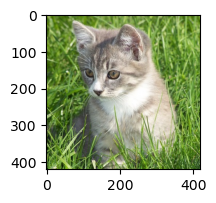

In [62]:
# Reading image
image = imread('kittycat.jpg')

# Plotting image
plt.figure(figsize=(2,2))
plt.imshow(image)
plt.show()

## Task 1: Basic image statistics (2 points)

In [63]:
def image_statistics(image: np.array) -> Tuple[float, float, float]:
    """
    Given a grayscale image of 8-bits, it should return a tuple with
    the maximum, minimum and average values of the
    pixels.
    """
    return np.max(image), np.min(image), np.mean(image)


In [64]:
# Tests that your function must pass

assert image_statistics(image[:,:,0])[0] == 255
assert image_statistics(image[:,:,0])[1] == 0
assert np.isclose(image_statistics(image[:,:,0])[2], 131.103)


In [65]:
def calculate_histogram(image: np.array, bins: int = 255) -> Tuple[np.array, np.array]:
    """
    Given a grayscale image of 8-bits, it should return two numpy 
    arrays: the first one a numpy array with the histogram
    and the second one with the bin edges according to the 
    number of bins selected. You should use a numpy 
    function to calculate the histogram.
    """
    
    return np.histogram(image, bins=bins)


To check if your answer is correct you should obtain 
the same graphic as this one in the next cell.

![image](hist.png)


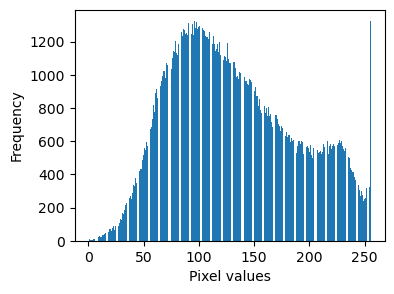

In [66]:
hist, edges = calculate_histogram(image[:,:,0])
plt.figure(figsize=(4,3))
plt.bar(edges[1:], hist)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.show()

In [67]:
try:
    assert (calculate_histogram(image[:,:,0], 5)[0] == np.array([8331,54144,55237,33667,25021])).all()
except:
    assert (calculate_histogram(image[:,:,0], 5)[0] == np.array([8340, 54234, 55086, 33685, 25055])).all()

### Task 2: Image transformations (4 points)

In [68]:
def invert_image(image: np.array) -> np.array:
    """
    Function that inverts a grayscale image of 8-bits. Dark areas should be brighter 
    and bright areas should be darker.It is equal to the operation (255 - image).
    The result should be a uint8 numpy array.
    """
    return (255 - image).astype(np.uint8)
    

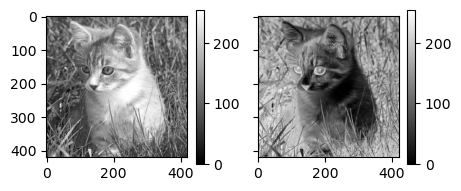

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(5, 2))
im_0 = axes[0].imshow(image[:,:,0], cmap='gray')
fig.colorbar(im_0, ax=axes[0])
im_1 = axes[1].imshow(invert_image(image[:,:,0]), cmap='gray')
fig.colorbar(im_1, ax=axes[1])
plt.show()

In [70]:
assert invert_image(image[:,:,0]).dtype == 'uint8'
assert (invert_image(np.array([233, 255, 0], dtype='uint8')) == np.array([22,0,255], dtype='uint8')).all()

In [71]:
def rotate_flip_image(image: np.array, rotation: int = 0, flip: bool = False) -> np.array:
    """
    This function should rotate an rgb image 0, 90, 180 or 270 degrees. 
    Other angle should return the following message: 'Error: the angle specified is not valid.'.  
    When flip is True, the image is mirrored over the x axis. 
    """
    if rotation not in (0, 90, 180, 270):
        return 'Error: the angle specified is not valid.'
    # times_to_rotate_by_90
    k = rotation // 90 if rotation != 90 else 1 # special for 90 since k would be k = 0
    new_image =  np.rot90(image, k, axes=(0, 1)) # rotate left 90 degrees k times
    if flip:
        new_image = np.flip(new_image, axis=1) # flip over y axis
    return new_image


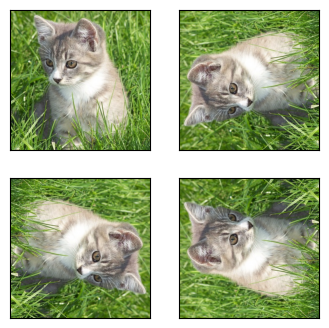

In [72]:
# Visualization of the results

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4, 4))
im_0 = axes[0,0].imshow(image)
im_1 = axes[0,1].imshow(rotate_flip_image(image, rotation=90))
im_2 = axes[1, 0].imshow(rotate_flip_image(image, rotation=90, flip=True))
im_3 = axes[1,1].imshow(rotate_flip_image(image, rotation=270, flip=True))
plt.setp(axes, xticks=[], yticks=[])
plt.show()

In [73]:
assert rotate_flip_image(image, rotation=90, flip=True).dtype == 'uint8'
assert rotate_flip_image(image, rotation=1) == 'Error: the angle specified is not valid.'
assert (rotate_flip_image(np.array([[1,2],[3,4]],dtype='uint8'), rotation=90, flip=True) == np.array([[4,2],[3, 1]], dtype='uint8')).all()
assert (rotate_flip_image(np.array([[1,2],[3,4]],dtype='uint8'), rotation=180) == np.array([[4,3],[2, 1]], dtype='uint8')).all()
assert (rotate_flip_image(np.array([[1,2],[3,4]],dtype='uint8'), rotation=270, flip=True) == np.array([[1,3],[2, 4]], dtype='uint8')).all()

In [74]:
def color_depth(image: np.array, number_bits: int) -> np.array:
    """
    The input is a grayscale image of 8-bits. The output image should be rescaled to 
    the number of bits indicated. The data type of the output should be uint16.
    """
    # We need to change the representation for each value of the image to the new number of bits
    # hence we need to divide the image by 2^(current_representaion - number_bits) and then cast it to uint16
    
    # np.uint16(image / (2**(8 - number_bits)) ) this also works but it's more expensive
    return (image >> 8 - number_bits).astype('uint16')

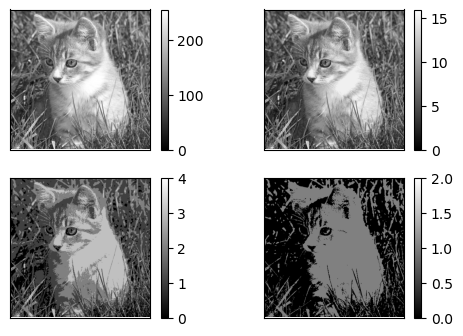

In [75]:
# Visualization of the results

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(6, 4))
number_bits = 8
im_0 = axes[0,0].imshow(color_depth(image[:,:,0], number_bits), vmax=2**number_bits, vmin=0, cmap='gray')
fig.colorbar(im_0, ax=axes[0,0])
number_bits = 4
im_1 = axes[0,1].imshow(color_depth(image[:,:,0], number_bits), vmax=2**number_bits, vmin=0, cmap='gray')
fig.colorbar(im_1, ax=axes[0,1])
number_bits = 2
im_2 = axes[1,0].imshow(color_depth(image[:,:,0], number_bits), vmax=2**number_bits, vmin=0, cmap='gray')
fig.colorbar(im_2, ax=axes[1,0])
number_bits = 1
im_3 = axes[1,1].imshow(color_depth(image[:,:,0], number_bits), vmax=2**number_bits, vmin=0, cmap='gray')
fig.colorbar(im_3, ax=axes[1,1])
plt.setp(axes, xticks=[], yticks=[])
plt.show()

In [76]:
assert color_depth(np.array([0, 125, 255], dtype='uint8'), 8).dtype == 'uint16'
assert (color_depth(np.array([0, 125, 255], dtype='uint8'), 8) == np.array([0, 125, 255], dtype='uint16')).all()
assert (color_depth(np.array([0, 125, 255], dtype='uint8'), 4) == np.array([0, 7, 15], dtype='uint16')).all()
assert (color_depth(np.array([0, 125, 255], dtype='uint8'), 2) == np.array([0, 1, 3], dtype='uint16')).all()

In [77]:
def halve_image(image: np.array, times: int) -> np.array:
    """
    The input image is an 8-bit rgb image. The output image must be reduced by 
    half the number of times indicated. If the new size is not an integer you  
    have to truncate the decimals. The output image should be an 8-bit image.
    You can use the resize function of scikit-image with preserve_range=True,
    No open-cv function is allowed.
    """
    # image.shape[0] // (2**times) is the new height and image.shape[1] // (2**times) is the new width
    # we can do this with bitshifting 
    return \
        resize(image, (image.shape[0] >> times , image.shape[1] >>times ) , preserve_range=True) \
        .astype('uint8')


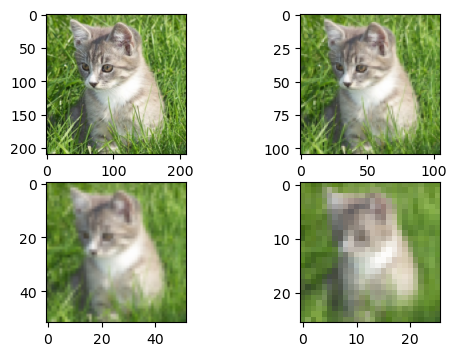

In [78]:
# Visualization of the results

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))
im_0 = axes[0,0].imshow(halve_image(image, times=1))
im_1 = axes[0,1].imshow(halve_image(image, times=2))
im_2 = axes[1,0].imshow(halve_image(image, times=3))
im_3 = axes[1,1].imshow(halve_image(image, times=4))
plt.show()

In [79]:
assert halve_image(image, times=2).dtype == 'uint8'
assert (halve_image(image, 0).shape == np.array([420, 420, 3])).all()
assert (halve_image(image, 3).shape == np.array([52, 52, 3])).all()
assert (halve_image(image, 5).shape == np.array([13, 13, 3])).all()
try:
    assert (halve_image(image, 8) == np.array([[[131, 149,  99]]], dtype='uint8')).all()
except:
    assert (halve_image(image, 8) == np.array([[[131, 149,  98]]], dtype='uint8')).all()


### Spatial filters (2 points)

In [80]:
def convolve(image: np.array, kernel: np.array) -> np.array:
    """
    Funtion to convolve a grayscale image given a kernel.
    """
    im = image.astype(np.float32)
    result = convolve2d(im, kernel, boundary='symm', mode='same')
    return result

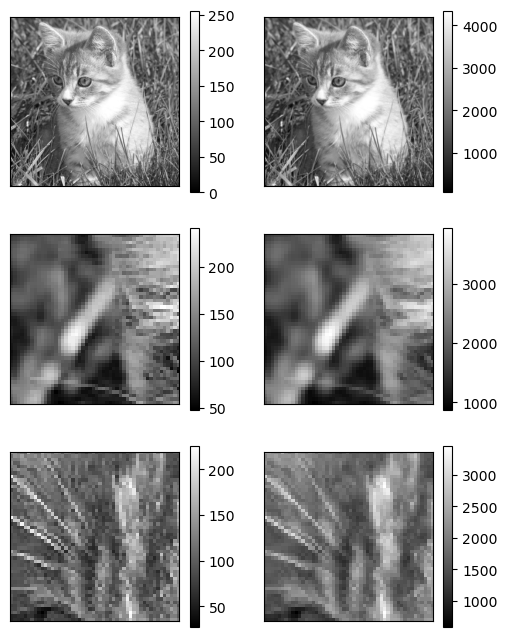

In [81]:
# Example of the effect of a kernel for smoothing an image
kernel = np.array([[1,1,1],[1,9,1], [1,1,1]])

image_channel = image[:,:,0]
convolved = convolve(image_channel, kernel)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))
im_0 = axes[0,0].imshow(image_channel, cmap='gray')
fig.colorbar(im_0, ax=axes[0,0])
im_1 = axes[0,1].imshow(convolved, cmap='gray')
fig.colorbar(im_1, ax=axes[0,1])
im_2 = axes[1,0].imshow(image_channel[50:100, 50:100], cmap='gray')
fig.colorbar(im_2, ax=axes[1,0])
im_3 = axes[1,1].imshow(convolved[50:100, 50:100], cmap='gray')
fig.colorbar(im_3, ax=axes[1,1])
im_4 = axes[2,0].imshow(image_channel[100:150, 100:150], cmap='gray')
fig.colorbar(im_4, ax=axes[2,0])
im_5 = axes[2,1].imshow(convolved[100:150, 100:150], cmap='gray')
fig.colorbar(im_5, ax=axes[2,1])
plt.setp(axes, xticks=[], yticks=[])
plt.show()

In [82]:
def sobel_filtering(image: np.array) -> np.array:
    """
    Define the function using the filters sobel_x and sobel_y using function "convolve" 
    defined before. The input is an grayscale image of 8-bits. The output is a gradient
    image calcluated using sobel operators both x and y.
    """
    # Define sobel filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Convolve the image with the sobel filters as kernels
    grad_x = convolve(image, sobel_x)
    grad_y = convolve(image, sobel_y)

    # Calculate gradient magnitude and direction
    grad_mag = np.sqrt(grad_x * grad_x + grad_y* grad_y)
    # grad_dir = np.arctan2(grad_y, grad_x)

    return grad_mag


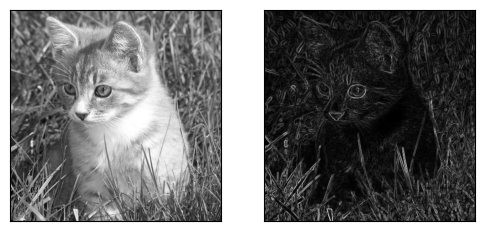

In [83]:
# Visualization of the results

filtered_image = sobel_filtering(image[:,:,0])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 8))
im_0 = axes[0].imshow(image_channel, cmap='gray')
im_1 = axes[1].imshow(filtered_image, cmap='gray')
plt.setp(axes, xticks=[], yticks=[])
plt.show()

In [84]:
try:
    sample = np.array([[149.271,117.889,51.478],[53.907,90.785,62.6258],
                   [63.529,43.863,93.648]])
    assert np.isclose(sobel_filtering(image[:,:,0])[100:103, 99:102], sample).all()
except:
    sample = np.array([[150.33296378, 119.54078802,  52.15361924],
    [ 53.90732789,  90.78546139,  61.3514466 ],
    [ 63.5295207 ,  43.8634244 ,  93.64827815]])
    assert np.isclose(sobel_filtering(image[:,:,0])[100:103, 99:102], sample).all()